I really like the way Andrew Ng describes bias and variance in Week 1 of *Improving Deep Neural Networks*.

Populating the interactive namespace from numpy and matplotlib


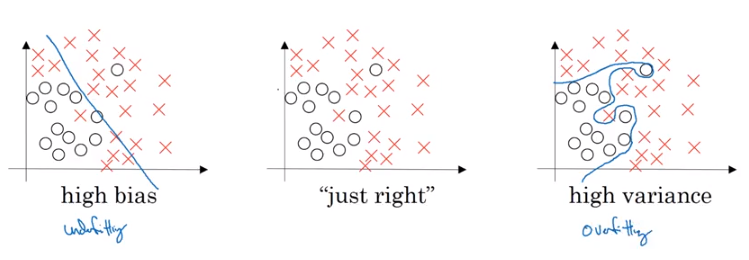

In [1]:
%pylab inline
from IPython.display import Image

Image('images/bias_variance.PNG')

A model with high bias often looks linear and takes broad stroke approach to classification.

Whereas a model with high variance has complicated fitting behavior to its training set, *and thus predicts poorly on new data*.

### Train vs Test Set Error

Or described using a simple example-- say you were trying to build a classifier to automate something you could *manually* do with an extremely-low error rate


<center><table>
<thead><tr><td>Train Set Error</td><td>Dev Set Error</td><td>Outcome</td></tr></thead>
<tr><td>1%</td><td>11%</td><td>High Variance</td></tr>
<tr><td>15%</td><td>16%</td><td>High Bias</td></tr>
<tr><td>15%</td><td>30%</td><td>High Bias, High Variance</td></tr>
<tr><td>1%</td><td>1%</td><td>Low Bias, Low Variance</td></tr>
</table></center>

So there are things that we can do to help stabilize these errors.

If you have a model with high bias, you might consider a more robust network or training longer. The meat of this notebook is in addressing high variance.

## Correction Schemes for High Variance

You have a model that has learned too niche/nuacned of features. And so you want to figure out some sort of penalizing scheme to keep your model from getting too excited about any one feature.

### L2 Normalization

L2 Normalization gives us a concept of distance or magnitude. The idea being that if any one feature is too "big" then you proportionally penalize your model.

In the same manner that the distance between two points can be expressed as

$\sqrt{(y_2 - y_1)^2 + (x_2 - x_1)^2}$

We can extend that same idea to a matrix via the following

$ \sqrt{\sum_{i=1}^{n} w_i^{2}}$

Which is available to us via a call to the convenient `numpy.linalg.norm()`

In [2]:
x = numpy.random.rand(5, 5)

numpy.linalg.norm(x)

3.0366626116644495

In the context of a Neural Network, this means that our new cost function becomes

$J(W^{[1]}, b^{[1]}, ..., W^{[l]}, b^{[l]}) = \frac{1}{m} \sum \mathcal{L}\big(\hat{y}^{i}, y^i\big) + \frac{\lambda}{2m} \sum_{l}\sum_j\sum_k||W_j^{l}||_k^{2}$

However, you should place great care in what value you put for this `lambda` parameter. Too large, and you will penalize everything and make all of your networks basically linear-- defeating the purpose of using non-linear activation functions.

On the other hand, too low and you're just adding more computation for little error correction.

### Dropout Regularization

Dropout regularization achieves a similar result, but through different means.

Instead of adjusting each weight via a constant, in dropout, we just deactivate nodes (with some random probability) during the forward and back propagation step of one cycle. Then we reactivate them and deactivate other nodes with the same random probability. This ensures that we don't ever over-rely on any one node to learn features, thus don't overfit.

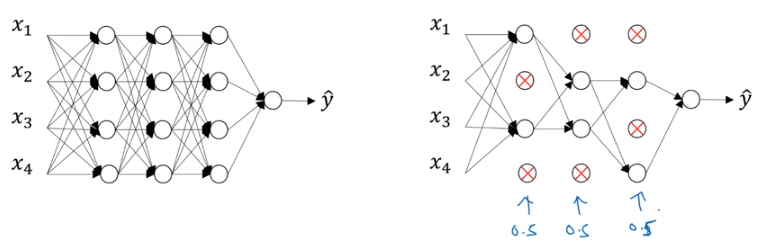

In [3]:
Image('images/dropout.PNG')

Couple notes on this, though:

- We don't do any sort of dropout when using the model to predict
- This completely muddies the monotonically-decreasing performance of Gradient Descent, so you lose that as a debugging tool